# 1. U-Net con Keras (TensorFlow)



In [ ]:
from tensorflow.keras import layers, models

def unet(input_size=(256, 256, 3)):
    inputs = layers.Input(input_size)

    # Encoder
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    # Bottleneck
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)

    # Decoder
    u4 = layers.UpSampling2D((2, 2))(c3)
    concat4 = layers.concatenate([u4, c2], axis=3)
    c4 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(concat4)
    c4 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c4)

    u5 = layers.UpSampling2D((2, 2))(c4)
    concat5 = layers.concatenate([u5, c1], axis=3)
    c5 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(concat5)
    c5 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c5)

    # Output layer
    output = layers.Conv2D(1, (1, 1), activation='sigmoid')(c5)

    model = models.Model(inputs, output)
    return model

# Crear el modelo U-Net
model = unet()
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │      1,792 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │     36,928 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │    147,584 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │    590,080 │ conv2d_4[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d       │ (None, 128, 128,  │          0 │ conv2d_5[0][0]    │
│ (UpSampling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 128, 128,  │          0 │ up_sampling2d[0]… │
│ (Concatenate)       │ 384)              │            │ conv2d_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 128, 128,  │    442,496 │ concatenate[0][0] │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 128, 128,  │    147,584 │ conv2d_6[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_1     │ (None, 256, 256,  │          0 │ conv2d_7[0][0]    │
│ (UpSampling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 256, 256,  │          0 │ up_sampling2d_1[… │
│ (Concatenate)       │ 192)              │            │ conv2d_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 256, 256,  │    110,656 │ concatenate_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 256, 256,  │     36,928 │ conv2d_8[0][0]  

 Total params: 1,883,137 (7.18 MB)

 Trainable params: 1,883,137 (7.18 MB)

 Non-trainable params: 0 (0.00 B)

# Explicación del código:


*   Capa de entrada: Recibe imágenes de tamaño 256x256 con 3 canales de color.
*   Encoder: Consta de dos bloques convolucionales seguidos de una operación de pooling para reducir la resolución.
*   Bottleneck: Se encuentra en la parte central del modelo, donde la resolución es más pequeña.


*   Decoder: Usamos upsampling para aumentar la resolución y concatenamos las capas correspondientes del encoder utilizando conexiones de salto.

*   Capa de salida: La última capa de convolución genera una máscara de segmentación binaria.



#2. Mask R-CNN (Segmentación de Instancias)

In [ ]:
# Instalar detectron2 en Google Colab
!pip install torch==1.13.1 torchvision==0.14.1
!pip install detectron2==0.6
!pip install git+https://github.com/facebookresearch/detectron2.git@main

  Using cached torch-1.13.1-cp311-cp311-manylinux1_x86_64.whl.metadata (24 kB)
ERROR: Ignored the following yanked versions: 0.1.6, 0.1.7, 0.1.8, 0.1.9, 0.2.0, 0.2.1, 0.2.2, 0.2.2.post2, 0.2.2.post3, 0.15.0
ERROR: Could not find a version that satisfies the requirement torchvision==0.14.1 (from versions: 0.15.1, 0.15.2, 0.16.0, 0.16.1, 0.16.2, 0.17.0, 0.17.1, 0.17.2, 0.18.0, 0.18.1, 0.19.0, 0.19.1, 0.20.0, 0.20.1, 0.21.0, 0.22.0)
ERROR: No matching distribution found for torchvision==0.14.1
  Cloning https://github.com/facebookresearch/detectron2.git (to revision main) to /tmp/pip-req-build-82o0dsnk
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-82o0dsnk
  Resolved https://github.com/facebookresearch/detectron2.git to commit 536dc9d527074e3b15df5f6677ffe1f4e104a4ab
  Preparing metadata (setup.py) ... done


/bin/bash: line 1: nvidia-smi: command not found
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cpp-12 cuda-12-8 cuda-cccl-12-8 cuda-command-line-tools-12-8
  cuda-compiler-12-8 cuda-crt-12-8 cuda-cudart-12-8 cuda-cudart-dev-12-8
  cuda-cuobjdump-12-8 cuda-cupti-12-8 cuda-cupti-dev-12-8 cuda-cuxxfilt-12-8
  cuda-demo-suite-12-8 cuda-documentation-12-8 cuda-driver-dev-12-8
  cuda-gdb-12-8 cuda-libraries-12-8 cuda-libraries-dev-12-8 cuda-nsight-12-8
  cuda-nsight-compute-12-8 cuda-nsight-systems-12-8 cuda-nvcc-12-8
  cuda-nvdisasm-12-8 cuda-nvml-dev-12-8 cuda-nvprof-12-8 cuda-nvprune-12-8
  cuda-nvrtc-12-8 cuda-nvrtc-dev-12-8 cuda-nvtx-12-8 cuda-nvvm-12-8
  cuda-nvvp-12-8 cuda-opencl-12-8 cuda-opencl-dev-12-8 cuda-profiler-api-12-8
  cuda-runtime-12-8 cuda-sanitizer-12-8 cuda-toolkit-12-8
  cuda-toolkit-12-8-config-common cuda-tools-12-8 cuda-visual-tools-12-8
  dctrl-tools default-jr

model_final_f10217.pkl: 178MB [00:01, 138MB/s]                           
/usr/local/lib/python3.11/dist-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


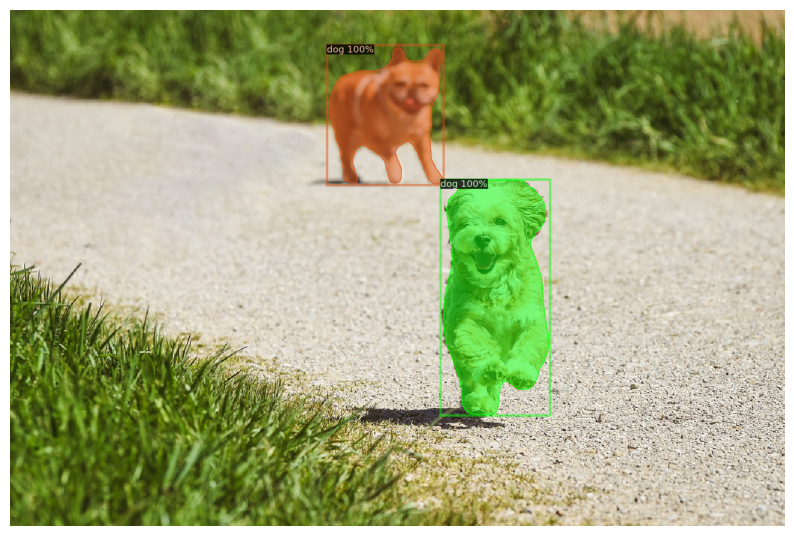

In [ ]:
# Check for GPU availability
!nvidia-smi

# Install CUDA toolkit (if not already installed)
!apt-get install cuda

import torch
# Check if CUDA is available and set device accordingly
if torch.cuda.is_available():
    device = torch.device('cuda')
    print("CUDA is available. Using GPU.")
else:
    device = torch.device('cpu')
    print("CUDA is not available. Using CPU.")

import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

# Paso 1: Configurar el modelo y el predictor
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 80  # Número de clases en COCO (puedes ajustarlo si usas otro conjunto de datos)
#Force the code to run on CPU
cfg.MODEL.DEVICE = "cpu"

# Configurar el predictor
predictor = DefaultPredictor(cfg)



# Cargar la imagen
image = cv2.imread('/content/dogs-7209506_1280.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir a RGB para visualización

# Paso 3: Realizar la predicción de Mask R-CNN
outputs = predictor(image)

# Paso 4: Visualización de los resultados
v = Visualizer(image_rgb, MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
result_image = v.get_image()

# Mostrar la imagen resultante
plt.figure(figsize=(10, 10))
plt.imshow(result_image)
plt.axis('off')
plt.show()


# Explicación del código:

*   Utilizamos un modelo preentrenado de Mask R-CNN.
*   RPN genera las propuestas de región.
*   Para cada región, se predicen tanto la clase como la máscara de segmentación.
*   Las máscaras generadas se superponen en la imagen original.



# **Actividad**

*   Comparar diferentes imagenes y establecer su importancia y el papel que juega en el proceso.
*   Ventajas y desventajas.




